In [3]:
sum=0
dic1 = {}
while True:
    item = input("消費項目")
    price = input("消費金額")
    try:
        if  sum+ int(price) > 1000:
            raise ValueError
        dic1[item] = price            
        sum+=int(price)   
        print(f"目前消費金額:{sum}")
    except ValueError:
         print('已經超支了')
         break   

消費項目AA
消費金額500
目前消費金額:500
消費項目BB
消費金額400
目前消費金額:900
消費項目CC
消費金額200
已經超支了


## 類別的繼承
+ 繼承語法  
class 子類別(父類別)：
  + 父類別類名寫在括號裡
  + 子類別繼承父類別的成員
    + 子類別找不到定義的成員，會自動尋找父類別內的定義。
    + 類別屬性、類別及實體方法、函數會被繼承下來
    + 實體屬性在__init__()中加入，不一定會被新增
  + 父類別的__init__( )初始化方法不會被自動使用
  + 需要在子類別的初始化方法中指定使用才會執行
     + super(子類別, self).__init__(…) 
     + 不呼叫父類別初始化方法時，不會新增父類別實體屬性   

In [30]:
class Animal:
    def __init__(self,name,age):
        self.name = name
        self.age = age
    def getName(self):
        return self.name
    def getAge(self):
        return self.age
a1 = Animal("Momo",2)
print(a1.getName(),a1.getAge())

class Cat(Animal):
    pass
#複寫override
class Dog(Animal):
    def __init__(self,name,age,weight):
        self.weight = weight
        super().__init__(name,age)#呼叫父類別的 __init__
    def getWeight(self):
        return self.weight
    
cat1 = Cat("Kitty",2)
print(cat1.getName(),cat1.getAge())

dog1 = Dog("Bobo",5,25)
print(dog1.getName(),dog1.getAge(),dog1.getWeight())

Momo 2
Kitty 2
 25 25


## 方法覆寫

In [29]:
class Parent:
    def myMethod(self):
        print("a")
class Child(Parent):
    def myMethod(self):
        print("b")
        super().myMethod()
c = Child()
c.myMethod()

b
a


## 多重繼承
+ 繼承多個父類別時用，隔開
+ 注意成員搜尋的順序
  + 從子類別開始
  + 同一階層父類別由左至右搜尋
  + 更上層祖父類別由左至右搜尋
  + 直到達到頂層為止

In [39]:
class S:
    def method1(self):
        print("S.method1")
    def method2(self):
        print("S.method2")
class A(S):
    def method3(self):
        print("A.method3")
class B(S):
    def method2(self):
        print("B.method2")
    def method3(self):
        print("B.method3")
class C(A,B):
     def method4(self):
        print("C.method4") 
c = C()
c.method4()
c.method3()
c.method2()
c.method1()

C.method4
A.method3
B.method2
S.method1


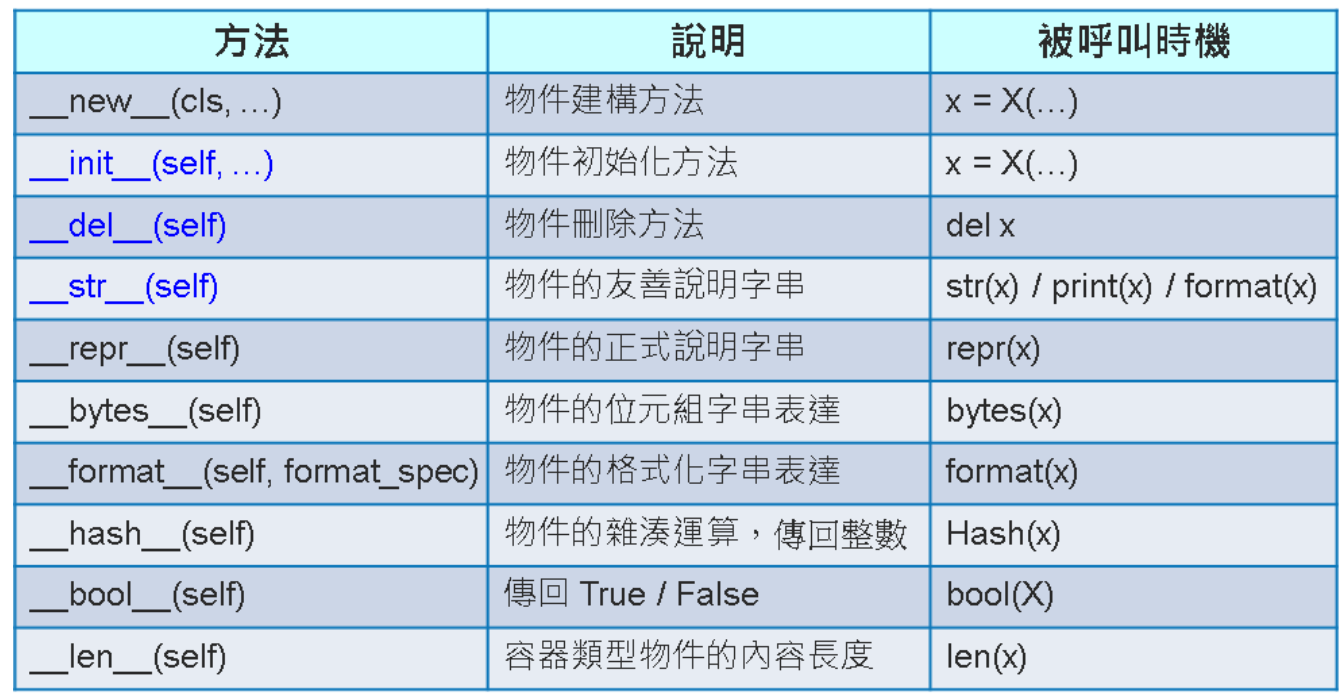

In [63]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __del__(self):
        n = self.__class__.__name__
        print(n,self,self.x,self.y,"del")
#p1 = Point(1,2)
#del p1
pt1 = Point(1,2)
pt2 = pt1
pt3 = pt1
pt4 = Point(3,4)
print(id(pt1),id(pt2),id(pt3),id(pt4))
del pt1
del pt2
del pt3
del pt4

2877627122112 2877627122112 2877627122112 2877627122016
Point <__main__.Point object at 0x0000029DFFF141C0> 1 2 del
Point <__main__.Point object at 0x0000029DFFF14160> 3 4 del


In [69]:
class Point:
    def __init__(self,x = 0, y =0):
        self.x = x
        self.y = y
    def __str__(self):
        return f"({self.x},{self.y})"
   
p1 = Point(2,3)
p2 = Point(-1,2)

print(p1)
print(p2)

(2,3)
(-1,2)


## Python類別特殊方法

In [72]:
class Point:
    def __init__(self,x = 0, y =0):
        self.x = x
        self.y = y
    def __str__(self):
        return f"({self.x},{self.y})"
    def __add__(self,other):
        x = self.x + other.x
        y = self.y + other.y
        return Point(x,y)
p1 = Point(2,3)
p2 = Point(-1,2)
print(p1 + p2)

(1,5)


In [87]:
class Point:
    def __init__(self,x = 0, y =0):
        self.x = x
        self.y = y
    def __str__(self):
        return f"({self.x},{self.y})"
    def __len__(self):
        return (self.x**2) + (self.ｙ**2)
    def __lt__(self,other):
        return len(self) < len(other)
p1 = Point(1,1)
p2 = Point(-2,-3)
print(len(p1))   
print(len(p2))  
print(p1 < p2)
print(p1 > p2)

2
13
True
False


In [88]:
p1 = Point(1,1)
p2 = Point(-2,-3)
p3 = Point(6,7)
p4 = Point(1,3)
pList = [p1,p2,p3,p4]
pList.sort()
for p in pList:
    print(p)

(1,1)
(1,3)
(-2,-3)
(6,7)


## 自己定義例外

In [93]:
class ValueToSmall(Exception):
    pass
def testEx(n):
    if n < 10:
        raise ValueToSmall
    print(n)    
testEx(2)

ValueToSmall: 